## 图像读取

In [66]:
import cv2 #opencv读取格式BGR
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

img = cv2.imread('cat.jpg') #读取图像

In [67]:
img #读取结果

array([[[192, 204, 204],
        [192, 204, 204],
        [185, 197, 197],
        ...,
        [198, 211, 213],
        [195, 208, 210],
        [191, 204, 206]],

       [[184, 196, 196],
        [189, 201, 201],
        [182, 194, 194],
        ...,
        [193, 206, 208],
        [190, 203, 205],
        [187, 200, 202]],

       [[191, 203, 203],
        [204, 216, 216],
        [193, 205, 205],
        ...,
        [194, 207, 209],
        [190, 203, 205],
        [189, 202, 204]],

       ...,

       [[131, 139, 139],
        [149, 157, 157],
        [172, 180, 180],
        ...,
        [110, 118, 118],
        [118, 126, 126],
        [131, 139, 139]],

       [[161, 169, 169],
        [185, 193, 193],
        [166, 174, 174],
        ...,
        [116, 124, 124],
        [130, 138, 138],
        [132, 140, 140]],

       [[173, 181, 181],
        [168, 176, 176],
        [156, 164, 164],
        ...,
        [163, 171, 171],
        [151, 159, 159],
        [155, 163, 163]]

In [5]:
#图像的显示，可以创建多个窗口
cv2.imshow('image',img)
#等待时间毫秒级，0表示任意键终止
cv2.waitKey(0)
cv2.destroyAllWindows()

In [6]:
def cv_show(name, img):
    cv2.imshow(name,img)
    #等待时间毫秒级，0表示任意键终止
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [7]:
img.shape #h w c

(1280, 1279, 3)

In [8]:
#cv2.IMREAD_COLOR: 彩色图像
#cv2.IMREAD_GRAYSCALE:灰度图像
img = cv2.imread('cat.jpg', cv2.IMREAD_GRAYSCALE)
img

array([[217, 207, 219, ..., 205, 207, 211],
       [197, 194, 201, ..., 207, 197, 188],
       [174, 182, 192, ..., 213, 200, 187],
       ...,
       [182, 171, 169, ..., 137, 156, 159],
       [176, 171, 173, ..., 143, 165, 169],
       [180, 183, 186, ..., 158, 178, 181]], dtype=uint8)

In [9]:
img.shape

(1280, 1279)

In [10]:
 cv_show('imge', img)

In [11]:
#保存
cv2.imwrite('mycat.png',img)

True

In [12]:
type(img)

numpy.ndarray

In [13]:
img.size

1637120

In [14]:
img.dtype

dtype('uint8')

## 视频的读取与处理

In [15]:
vc = cv2.VideoCapture('abstract.mp4') #捕获摄像头

In [16]:
#检查是否打开正确
if vc.isOpened():
    open, frame = vc.read()
else:
    open = Flase

In [18]:
#vc.read() 是从视频捕捉对象 vc 中读取帧。ret 是一个布尔值，表示读取是否成功；frame 则是当前帧的图像数据。如果成功读取，frame 将包含当前帧的图像。
while open:
    ret, frame = vc.read()
    if frame is None:
        break
    if ret == True:
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        cv2.imshow('result', gray)
        if cv2.waitKey(10) & 0xFF == 27: #退出键
            break
vc.release()
cv2.destroyAllWindows()

## 3-ROI区域
### 截取部分图像数据

In [21]:
img = cv2.imread('cat.jpg')
cat = img[100:500, 0:200]
cv_show('cat', cat)

### 颜色通道提取

In [23]:
b, g, r = cv2.split(img)

In [24]:
r

array([[204, 204, 197, ..., 213, 210, 206],
       [196, 201, 194, ..., 208, 205, 202],
       [203, 216, 205, ..., 209, 205, 204],
       ...,
       [139, 157, 180, ..., 118, 126, 139],
       [169, 193, 174, ..., 124, 138, 140],
       [181, 176, 164, ..., 171, 159, 163]], dtype=uint8)

In [25]:
r.shape

(500, 500)

In [31]:
img1 = cv2.merge((b, g, r))
img1

array([[[192, 204, 204],
        [192, 204, 204],
        [185, 197, 197],
        ...,
        [198, 211, 213],
        [195, 208, 210],
        [191, 204, 206]],

       [[184, 196, 196],
        [189, 201, 201],
        [182, 194, 194],
        ...,
        [193, 206, 208],
        [190, 203, 205],
        [187, 200, 202]],

       [[191, 203, 203],
        [204, 216, 216],
        [193, 205, 205],
        ...,
        [194, 207, 209],
        [190, 203, 205],
        [189, 202, 204]],

       ...,

       [[131, 139, 139],
        [149, 157, 157],
        [172, 180, 180],
        ...,
        [110, 118, 118],
        [118, 126, 126],
        [131, 139, 139]],

       [[161, 169, 169],
        [185, 193, 193],
        [166, 174, 174],
        ...,
        [116, 124, 124],
        [130, 138, 138],
        [132, 140, 140]],

       [[173, 181, 181],
        [168, 176, 176],
        [156, 164, 164],
        ...,
        [163, 171, 171],
        [151, 159, 159],
        [155, 163, 163]]

In [33]:
#只保留R
cur_img = img.copy()
cur_img[:,:,0] = 0
cur_img[:,:,1] = 0
cv_show('R', cur_img)
cur_img

array([[[  0,   0, 204],
        [  0,   0, 204],
        [  0,   0, 197],
        ...,
        [  0,   0, 213],
        [  0,   0, 210],
        [  0,   0, 206]],

       [[  0,   0, 196],
        [  0,   0, 201],
        [  0,   0, 194],
        ...,
        [  0,   0, 208],
        [  0,   0, 205],
        [  0,   0, 202]],

       [[  0,   0, 203],
        [  0,   0, 216],
        [  0,   0, 205],
        ...,
        [  0,   0, 209],
        [  0,   0, 205],
        [  0,   0, 204]],

       ...,

       [[  0,   0, 139],
        [  0,   0, 157],
        [  0,   0, 180],
        ...,
        [  0,   0, 118],
        [  0,   0, 126],
        [  0,   0, 139]],

       [[  0,   0, 169],
        [  0,   0, 193],
        [  0,   0, 174],
        ...,
        [  0,   0, 124],
        [  0,   0, 138],
        [  0,   0, 140]],

       [[  0,   0, 181],
        [  0,   0, 176],
        [  0,   0, 164],
        ...,
        [  0,   0, 171],
        [  0,   0, 159],
        [  0,   0, 163]]

In [36]:
#只保留G
cur_img = img.copy()
cur_img[:,:,0] = 0
cur_img[:,:,2] = 0
cv_show('G', cur_img)

In [35]:
#只保留B
cur_img = img.copy()
cur_img[:,:,2] = 0
cur_img[:,:,1] = 0
cv_show('R', cur_img)

## 4-边界填充

In [42]:
top_size, bottom_size, left_size, right_size = (50, 50, 50, 50)

replicate = cv2.copyMakeBorder(img, top_size, bottom_size, left_size, right_size, borderType = cv2.BORDER_REPLICATE)
reflect = cv2.copyMakeBorder(img, top_size, bottom_size, left_size, right_size, borderType = cv2.BORDER_REFLECT)
reflect101 = cv2.copyMakeBorder(img, top_size, bottom_size, left_size, right_size, borderType = cv2.BORDER_REFLECT_101)
wrap = cv2.copyMakeBorder(img, top_size, bottom_size, left_size, right_size, borderType = cv2.BORDER_WRAP)
constant = cv2.copyMakeBorder(img, top_size, bottom_size, left_size, right_size, borderType = cv2.BORDER_CONSTANT, value = 0)

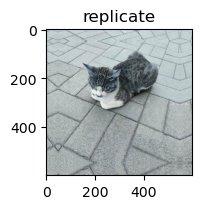

In [48]:
import matplotlib.pyplot as plt

plt.subplot(231), plt.imshow(img, 'gray'), plt.title('original')
plt.subplot(231), plt.imshow(replicate, 'gray'), plt.title('replicate')
plt.subplot(231), plt.imshow(reflect, 'gray'), plt.title('replicate')
#plt.subplot(231), plt.imshow(reflect101, 'gray'), plt.title('replicate101')
#plt.subplot(231), plt.imshow(wrap, 'gray'), plt.title('wrap')
#plt.subplot(231), plt.imshow(constant, 'gray'), plt.title('constant')

plt.show()

## 5-数值计算

In [49]:
img_cat = cv2.imread('cat.jpg')
img_dog = cv2.imread('dog.jpg')

In [50]:
img_cat2 = img_cat + 10
img_cat[:5,:,0] #取5行R通道

array([[192, 192, 185, ..., 198, 195, 191],
       [184, 189, 182, ..., 193, 190, 187],
       [191, 204, 193, ..., 194, 190, 189],
       [182, 171, 177, ..., 198, 196, 198],
       [142, 154, 161, ..., 191, 189, 191]], dtype=uint8)

In [51]:
img_cat2[:5,:,0] #取5行R通道

array([[202, 202, 195, ..., 208, 205, 201],
       [194, 199, 192, ..., 203, 200, 197],
       [201, 214, 203, ..., 204, 200, 199],
       [192, 181, 187, ..., 208, 206, 208],
       [152, 164, 171, ..., 201, 199, 201]], dtype=uint8)

In [53]:
(img_cat + img_cat2)[:5,:,0] #% 256

array([[138, 138, 124, ..., 150, 144, 136],
       [122, 132, 118, ..., 140, 134, 128],
       [136, 162, 140, ..., 142, 134, 132],
       [118,  96, 108, ..., 150, 146, 150],
       [ 38,  62,  76, ..., 136, 132, 136]], dtype=uint8)

In [54]:
cv2.add(img_cat, img_cat2)[:5,:,0]

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

### 图像融合

In [58]:
img_cat.shape
img_dog.shape

(666, 500, 3)

In [68]:
img_dog = cv2.resize(img_dog, (500, 500))
img_dog.shape

(500, 500, 3)

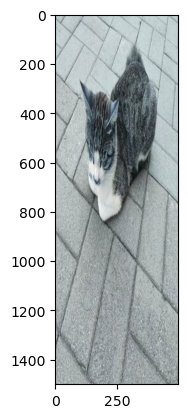

In [69]:
res = cv2.resize(img, (0, 0), fx = 1, fy = 3)
plt.imshow(res)
plt.show()

In [70]:
res = cv2.addWeighted(img_cat, 0.4, img_dog, 0.6, 0)

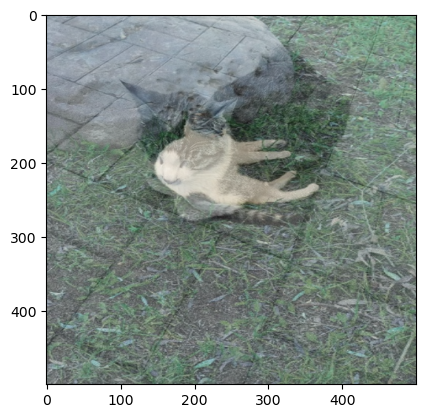

In [72]:
plt.imshow(res)
plt.show()

## 图像阈值